In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("eval_ckpt200_s1.csv")
display(df)

#read
obs_columns = [f'obs{i}' for i in range(15)]
obs_array = df[obs_columns].to_numpy()

obs_array = np.repeat(obs_array, repeats=3, axis=1) #repeat 3 times to simulate hisotry 3
obs_array.shape

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs5,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14
0,0,0.001748,0.000804,0.091593,0.260363,0.009699,-0.009958,2.562381,0.116498,0.094974,...,0.124308,0.089357,-0.091056,-0.360373,0.547365,-0.836894,-0.992651,0.121015,-0.408787,0.912630
1,1,0.002987,0.002035,0.100634,0.282176,0.041909,-0.024924,2.431866,0.104963,0.104322,...,0.156892,0.119632,-0.100151,-0.267302,0.651627,-0.758540,-0.992651,0.121015,-0.372139,0.928177
2,2,0.005389,0.003050,0.108341,0.301255,0.056624,-0.032901,2.238013,0.249709,0.079559,...,0.128447,0.024416,-0.021860,-0.493914,0.785547,-0.618802,-0.992651,0.121015,-0.346904,0.937901
3,3,0.008924,0.004031,0.114101,0.321520,0.055925,-0.033618,1.993780,0.314552,0.089095,...,0.159524,-0.008911,0.014285,-0.553117,0.911868,-0.410483,-0.992651,0.121015,-0.328635,0.944457
4,4,0.012791,0.005248,0.117382,0.347960,0.051232,-0.032327,1.745200,0.325632,0.113913,...,0.207444,-0.016956,0.020956,-0.551945,0.984830,-0.173520,-0.992651,0.121015,-0.309374,0.950940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.033361,0.190061,0.061563,2.217383,-0.317834,1.342060,-44.819698,0.000028,0.000095,...,0.000057,-0.000013,-0.000072,0.017017,-0.742906,0.669396,-0.002810,-0.999996,0.573343,-0.819315
3996,3996,0.033361,0.190062,0.061563,2.217384,-0.317827,1.342048,-44.813797,0.000018,0.000113,...,0.000078,-0.000016,-0.000070,0.011245,-0.738943,0.673768,-0.002810,-0.999996,0.573371,-0.819296
3997,3997,0.033362,0.190063,0.061563,2.217391,-0.317819,1.342044,-44.808537,0.000011,0.000097,...,0.000077,-0.000013,-0.000059,0.011842,-0.735388,0.677646,-0.002810,-0.999996,0.573390,-0.819283
3998,3998,0.033362,0.190065,0.061562,2.217395,-0.317813,1.342039,-44.803761,0.000021,0.000100,...,0.000071,-0.000016,-0.000074,0.009989,-0.732143,0.681151,-0.002810,-0.999996,0.573406,-0.819272


(4000, 45)

Text(0.5, 0, 'Time (s)')

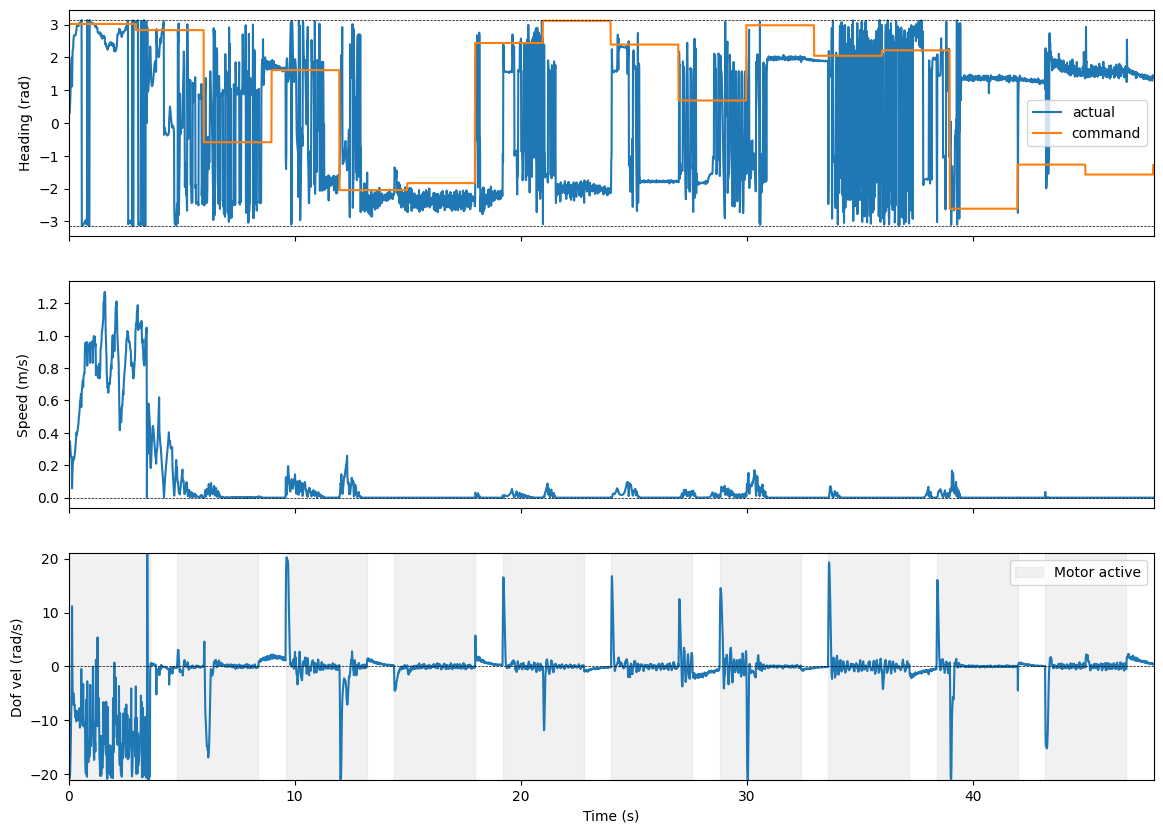

In [3]:
dt = 0.012
heading = np.arctan2(df['vel1'], df['vel0'])
speed = np.linalg.norm(df[['vel0', 'vel1']], axis=1)

des_heading = np.arctan2(df['obs12'], df['obs11']) 

# heading = np.unwrap(heading)
# diff = heading - des_heading
# wrapped_diff = (diff+np.pi)//(2*np.pi)
# # Add the wrapped difference back to angle2
# des_heading = des_heading + wrapped_diff*2*np.pi

fig, axs = plt.subplots(3,1, sharex=True, figsize=(14,10))
axs[0].plot(np.arange(len(df))*dt, heading, label='actual')
axs[0].plot(np.arange(len(df))*dt, des_heading, label='command')
axs[0].axhline(-np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].axhline(np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].set_ylabel('Heading (rad)')
axs[0].legend()


axs[1].plot(np.arange(len(df))*dt, speed)
axs[1].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[1].set_ylabel('Speed (m/s)')


action_filtered = np.zeros(len(df))
alpha = 0.6
for i in range(1, len(df)):
    action_filtered[i] = action_filtered[i-1]*alpha + df['action'][i]*(1-alpha)

axs[2].plot(np.arange(len(df))*dt, df['obs8']*37.5)
# axs[2].plot(np.arange(len(df))*dt, df['action'])
# axs[2].plot(np.arange(len(df))*dt, action_filtered)
axs[2].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[2].set_ylabel('Dof vel (rad/s)')
axs[2].set_xlim(0,len(df)*dt)

# Create mask for the colored region
episode_length = np.arange(len(df))
mask = ((episode_length % 400) > 0) & ((episode_length % 400) <= 300)

# Plot shaded region
axs[2].fill_between(np.arange(len(df))*dt, -100, 100, 
                    where=mask, 
                    color='lightgray', 
                    alpha=0.3,
                    label='Motor active')
axs[2].set_ylim(-21, 21) # Set reasonable y-limits
axs[2].legend()



axs[-1].set_xlabel('Time (s)')

/tmp/ipykernel_1705284/529650738.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,2000)


(1.1020493850140642, 2000)

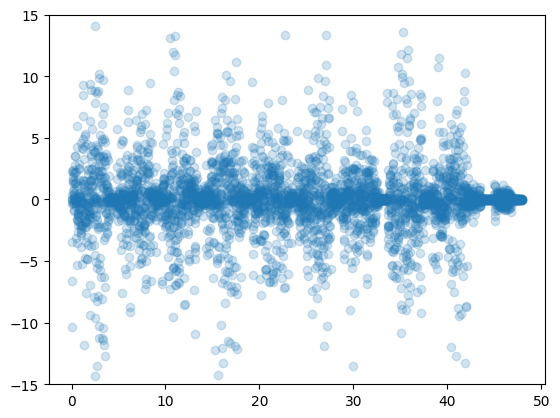

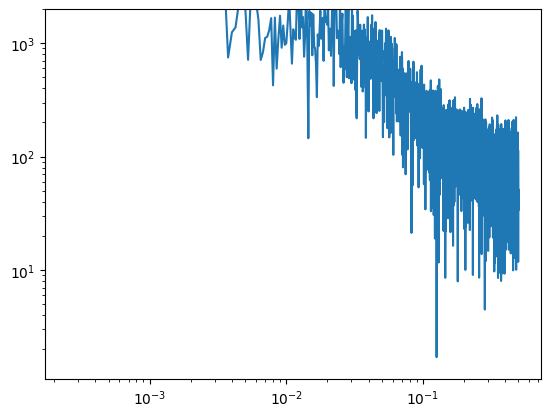

In [6]:
dofvel = df['obs8']*37.5
diffdofvel = np.diff(dofvel,prepend=0)

energy = diffdofvel**2
energy = np.cumsum(energy)

plt.figure()
plt.scatter(np.arange(len(df))*dt, diffdofvel, alpha=0.2)
plt.ylim(-15,15)

#FFT of dofvel
fft = np.fft.fft(dofvel)
frequencies = np.fft.fftfreq(len(dofvel))
plt.figure()
# plt.plot(frequencies, np.abs(fft))
#just the positive frequencies
plt.plot(frequencies[frequencies>0], np.abs(fft[frequencies>0]))
#make loglog
plt.xscale('log')
plt.yscale('log')
plt.ylim(0,2000)

